In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString
%matplotlib inline
import matplotlib.pyplot as plt
import contextily as ctx # Für Hintergrundkarte
folderpath=r"C:\Users\Zoe\Desktop\maz-datenjournalismus\Daten_BR_Handelsreg"
folderpath_geo=r"C:\Users\Zoe\Desktop\maz-datenjournalismus\Geodaten"

Auf windows funktioniert die Instellation von contextil am besten via conda-Befehl. (anders gehts nicht)
- conda install contextily --channel conda-forge


# Finen und Laden der Karte der Gemeinden 
Hier gefunden:
https://www.bfs.admin.ch/bfs/de/home/dienstleistungen/geostat/geodaten-bundesstatistik/administrative-grenzen/generalisierte-gemeindegrenzen.html


In [2]:
gdf_gemeinden = gpd.read_file(folderpath_geo+'/ggg_2019-LV95/shp/g1a19.shp')

In [3]:
gdf_zg=gdf_gemeinden[gdf_gemeinden["AName"]=="Zug"]

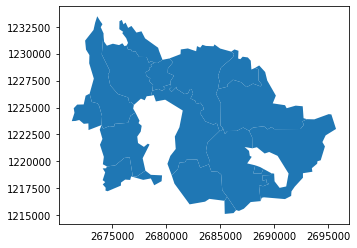

In [4]:
gdf_zg.plot()

## hier die Stadt Zug

In [5]:
gdf_stadtzug=gdf_zg[gdf_zg["GMDNAME"]=="Zug"]

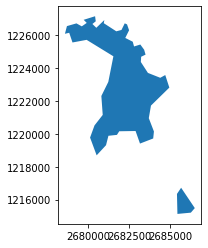

In [6]:
gdf_stadtzug.plot()

# File mit den HR-Daten 


In [7]:
df_sauber=pd.read_csv(folderpath+"/BRFrames/Stadt_Vergleich_grosser_als_Null")

In [8]:
dfhr=df_sauber[["Adresse", "Firmen","Telbuch","Vergleich", "GDENAME", "GKODE","GKODN"]]

In [9]:
dfhr.dtypes

Adresse       object
Firmen         int64
Telbuch        int64
Vergleich    float64
GDENAME       object
GKODE        float64
GKODN        float64
dtype: object

In [10]:
# Nun nur jene Adressen rausfiltern, an welchen Firmen ansässig sind
dfhr_pl=dfhr[dfhr["Firmen"]>0]

In [11]:
# Noch eine Spalte kreieren mit der Wurzel aus der Anzahl Firmen (kann so evtl besser dargestellt werden)
dfhr_pl["Wurzelwert"]=dfhr_pl["Firmen"]**(1/2)

In [12]:
dfhr_pl

,Adresse,Firmen,Telbuch,Vergleich,GDENAME,GKODE,GKODN,Wurzelwert
0,"Chamerstrasse 56, Zug",27,13,2.076923,Zug,2680767.178,1225465.852,5.196152
1,"Chamerstrasse 56a, Zug",4,1,4.000000,Zug,2680843.426,1225394.913,2.000000
2,"Chamerstrasse 61, Zug",3,3,1.000000,Zug,2680565.382,1225536.612,1.732051
3,"Chamerstrasse 63, Zug",4,1,4.000000,Zug,2680545.495,1225542.482,2.000000
4,"Chamerstrasse 65, Zug",4,2,2.000000,Zug,2680530.197,1225560.294,2.000000
...,...,...,...,...,...,...,...,...
1010,"Chamerstrasse 45, Zug",2,5,0.400000,Zug,2680878.372,1225294.140,1.414214
1011,"Chamerstrasse 47, Zug",1,4,0.250000,Zug,2680840.404,1225315.633,1.000000
1012,"Chamerstrasse 50, Zug",15,12,1.250000,Zug,2680869.425,1225328.661,3.872983
1013,"Chamerstrasse 52, Zug",11,5,2.200000,Zug,2680846.193,1225345.734,3.316625


In [13]:
# Kreieren der Angabe der Geometrie. Mit Hilfe der Gemeindekoordinaten.
dfhr_pl['Punkt'] = dfhr_pl.apply(lambda row: Point(row["GKODE"], row["GKODN"]), axis=1)

In [14]:
gdf_hr=gpd.GeoDataFrame(dfhr_pl, geometry="Punkt")

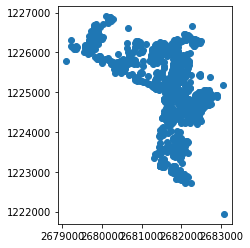

In [15]:
gdf_hr.plot()

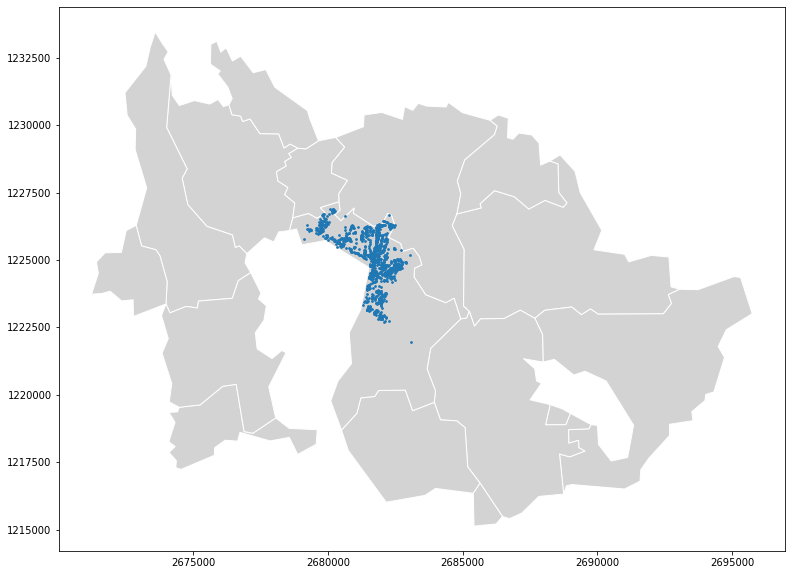

In [16]:
ax = gdf_zg.plot(figsize=(14,10), color='lightgrey', edgecolor='white')
gdf_hr.plot(figsize=(14,10), markersize=3, ax=ax)

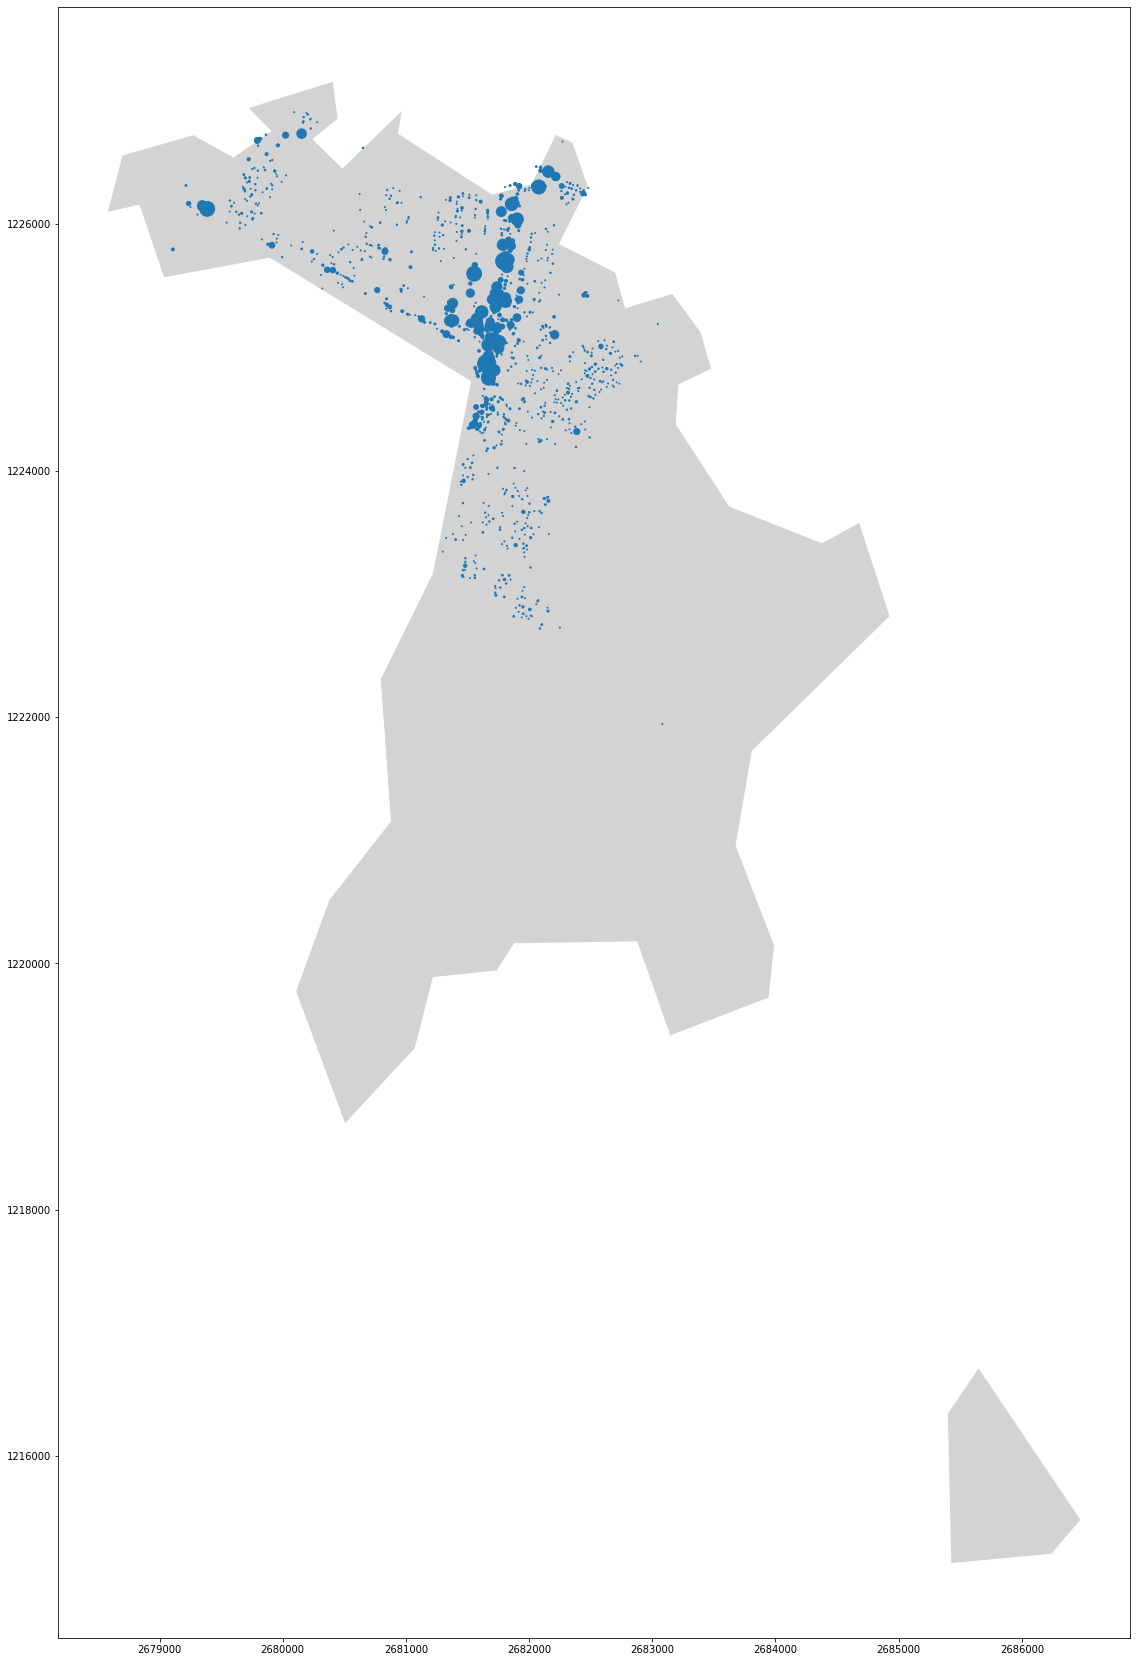

In [32]:
# Nun noch auf der Karte von der Stadt alleine
ax = gdf_stadtzug.plot(figsize=(20,30), color='lightgrey', edgecolor='white')
gdf_hr.plot(figsize=(20,30), markersize=gdf_hr['Firmen'], ax=ax)

### Punkte in unterschiedlicher Grösse

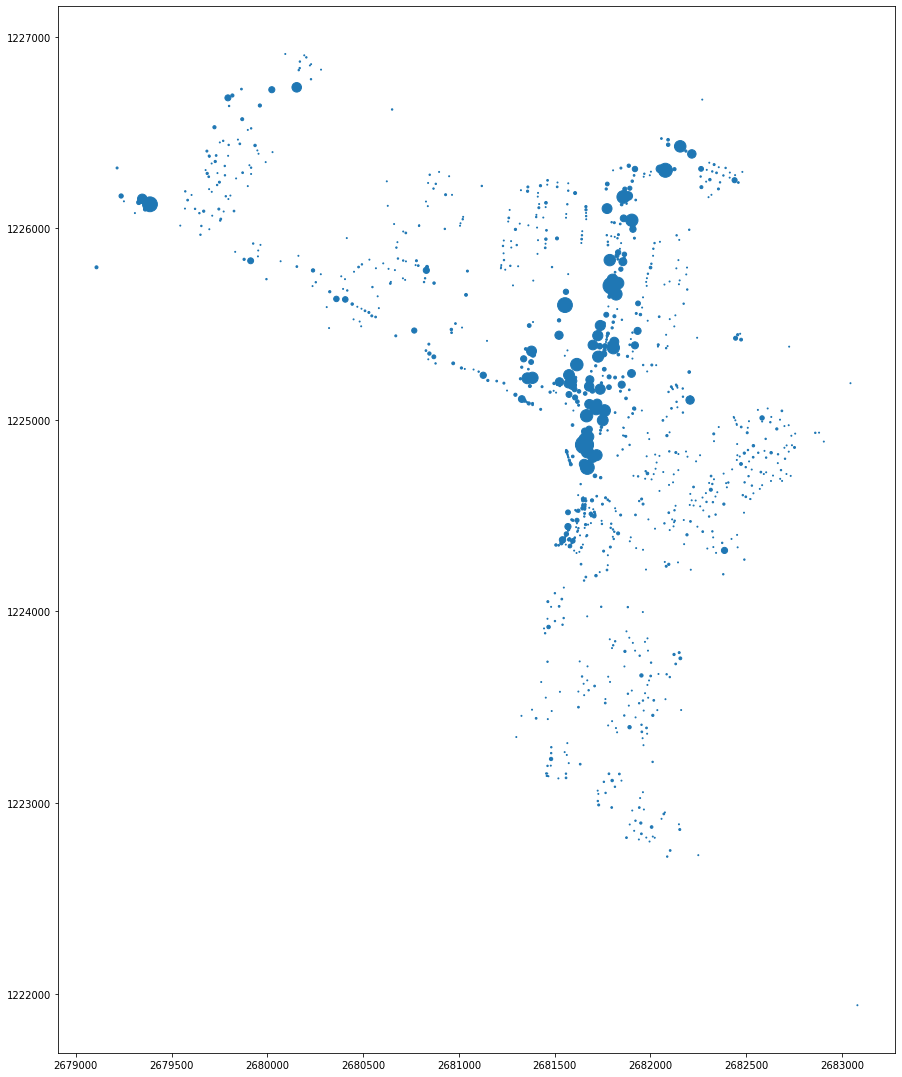

In [17]:
gdf_hr.plot(markersize=gdf_hr['Firmen'], figsize=(15,20))

Text(0.5, 1, 'Firmensitze in der Stadt Zug')

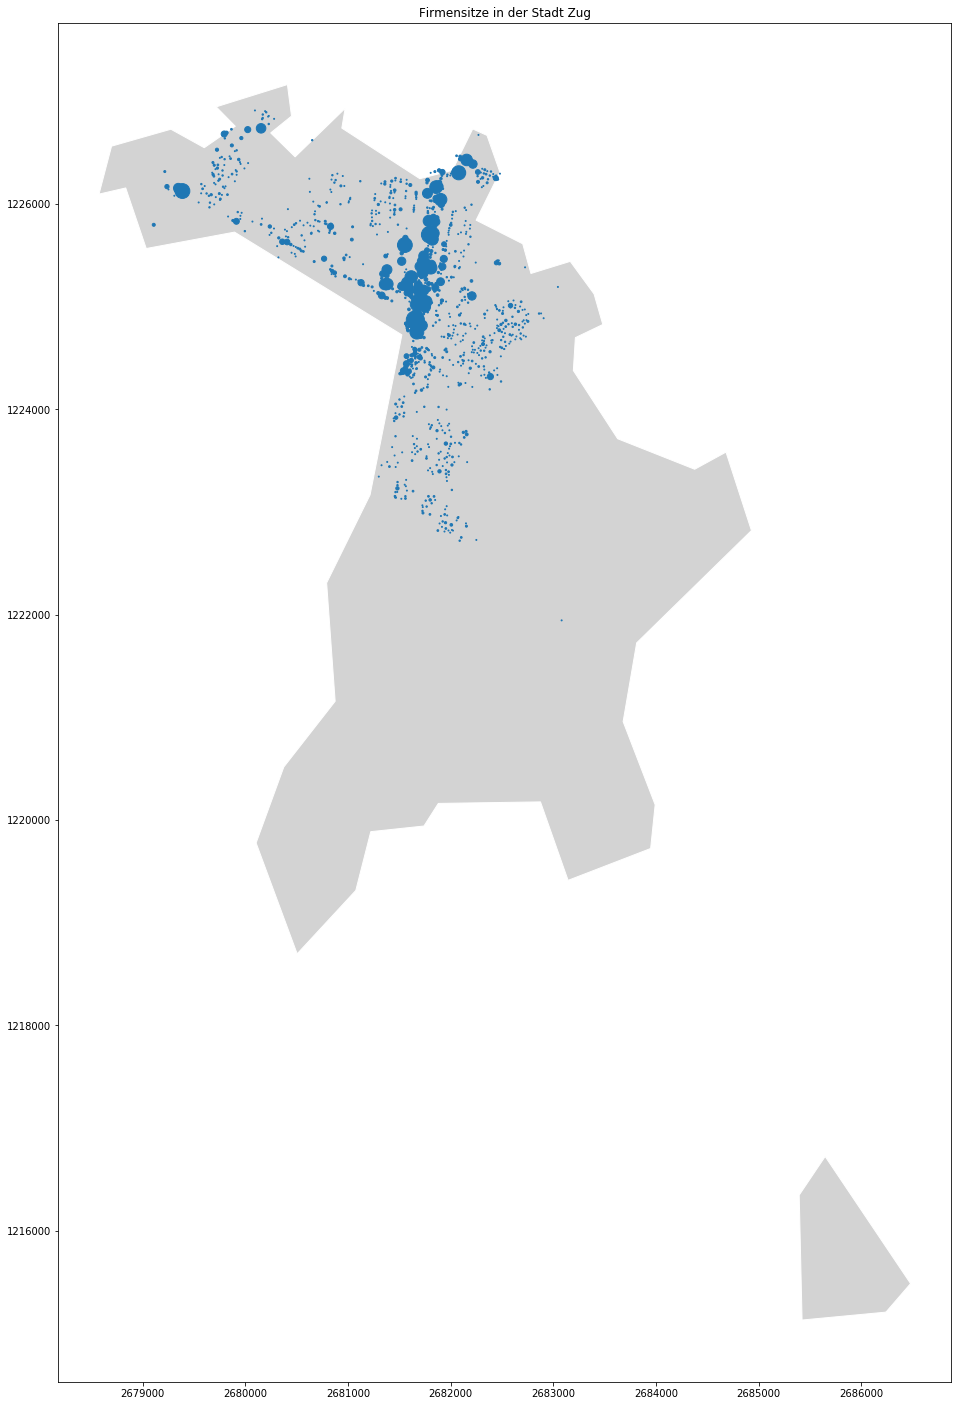

In [60]:
ax = gdf_stadtzug.plot(figsize=(20,25), color='lightgrey', edgecolor='white')
gdf_hr.plot(figsize=(20,25), markersize=gdf_hr['Anzahl'], ax=ax)
ax.set_title("Firmensitze in der Stadt Zug")

# Zoomen
Nun muss man noch besser sehen, wo das ist.
- 1. Soll nur der Teil der STadt sichtbar sein, wo es Firmen gibt.
- 2. Will ich noch die Strassen hinzufügen.

(2678000, 2684000)

(2678000, 2684000)

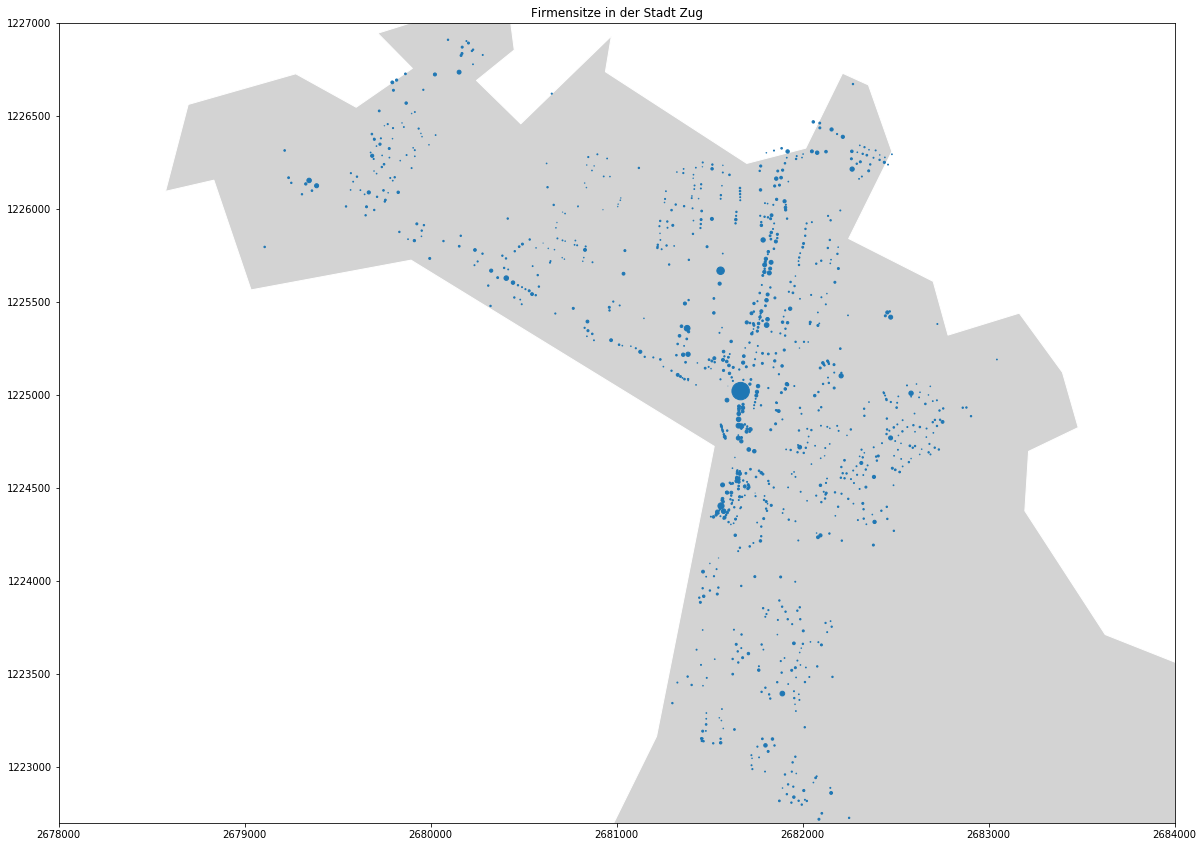

In [42]:
ax = gdf_stadtzug.plot(figsize=(20,25), color='lightgrey', edgecolor='white')
gdf_hr.plot(figsize=(20,25), markersize=(gdf_hr['Vergleich']*2), ax=ax)
ax.set_title("Firmensitze in der Stadt Zug")
ax.set_ylim([1222700,1227000])
ax.set_xlim([2678000, 2684000])

(2678000, 2684000)

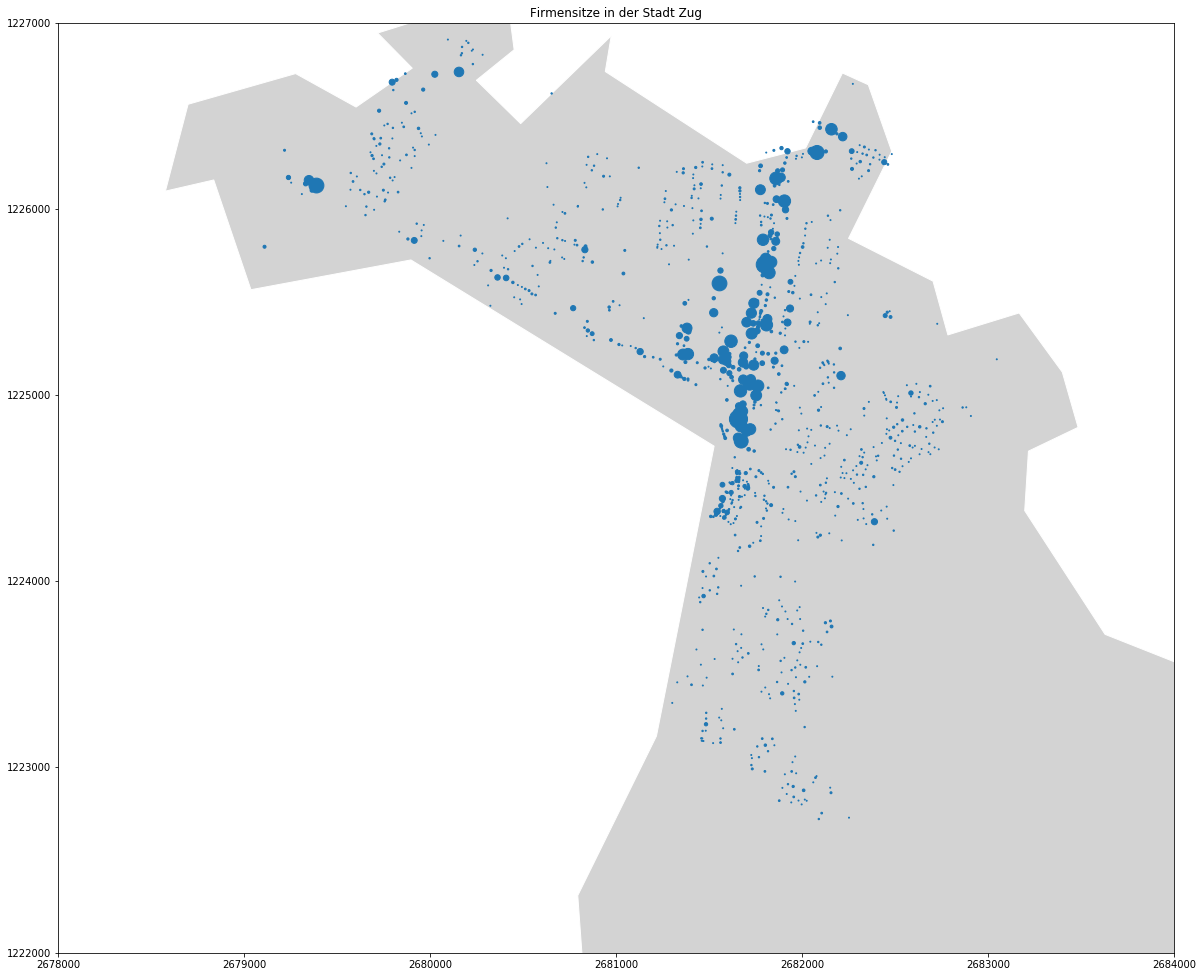

In [39]:
# Nun noch mit den Firmen
ax = gdf_stadtzug.plot(figsize=(20,25), color='lightgrey', edgecolor='white')
gdf_hr.plot(figsize=(20,25), markersize=gdf_hr['Firmen'], ax=ax)
ax.set_title("Firmensitze in der Stadt Zug")
ax.set_ylim([1222000,1227000])
ax.set_xlim([2678000, 2684000])

### Karte mit Strassen
um es für die Grafik einfacher zu machen, versuche ich die Punkte nun noch auf eine Strassenkarte zu plotten.

In [10]:
gdf_strassen = gpd.read_file(folderpath_geo+'\Kanton_Zug_Strassen\shapefiles\kantonale_ausnahmetransportrouten\\route.shp')

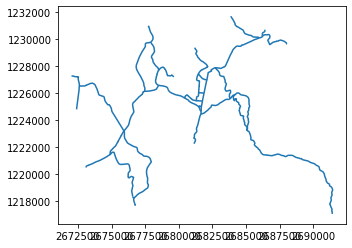

In [45]:
gdf_strassen.plot()

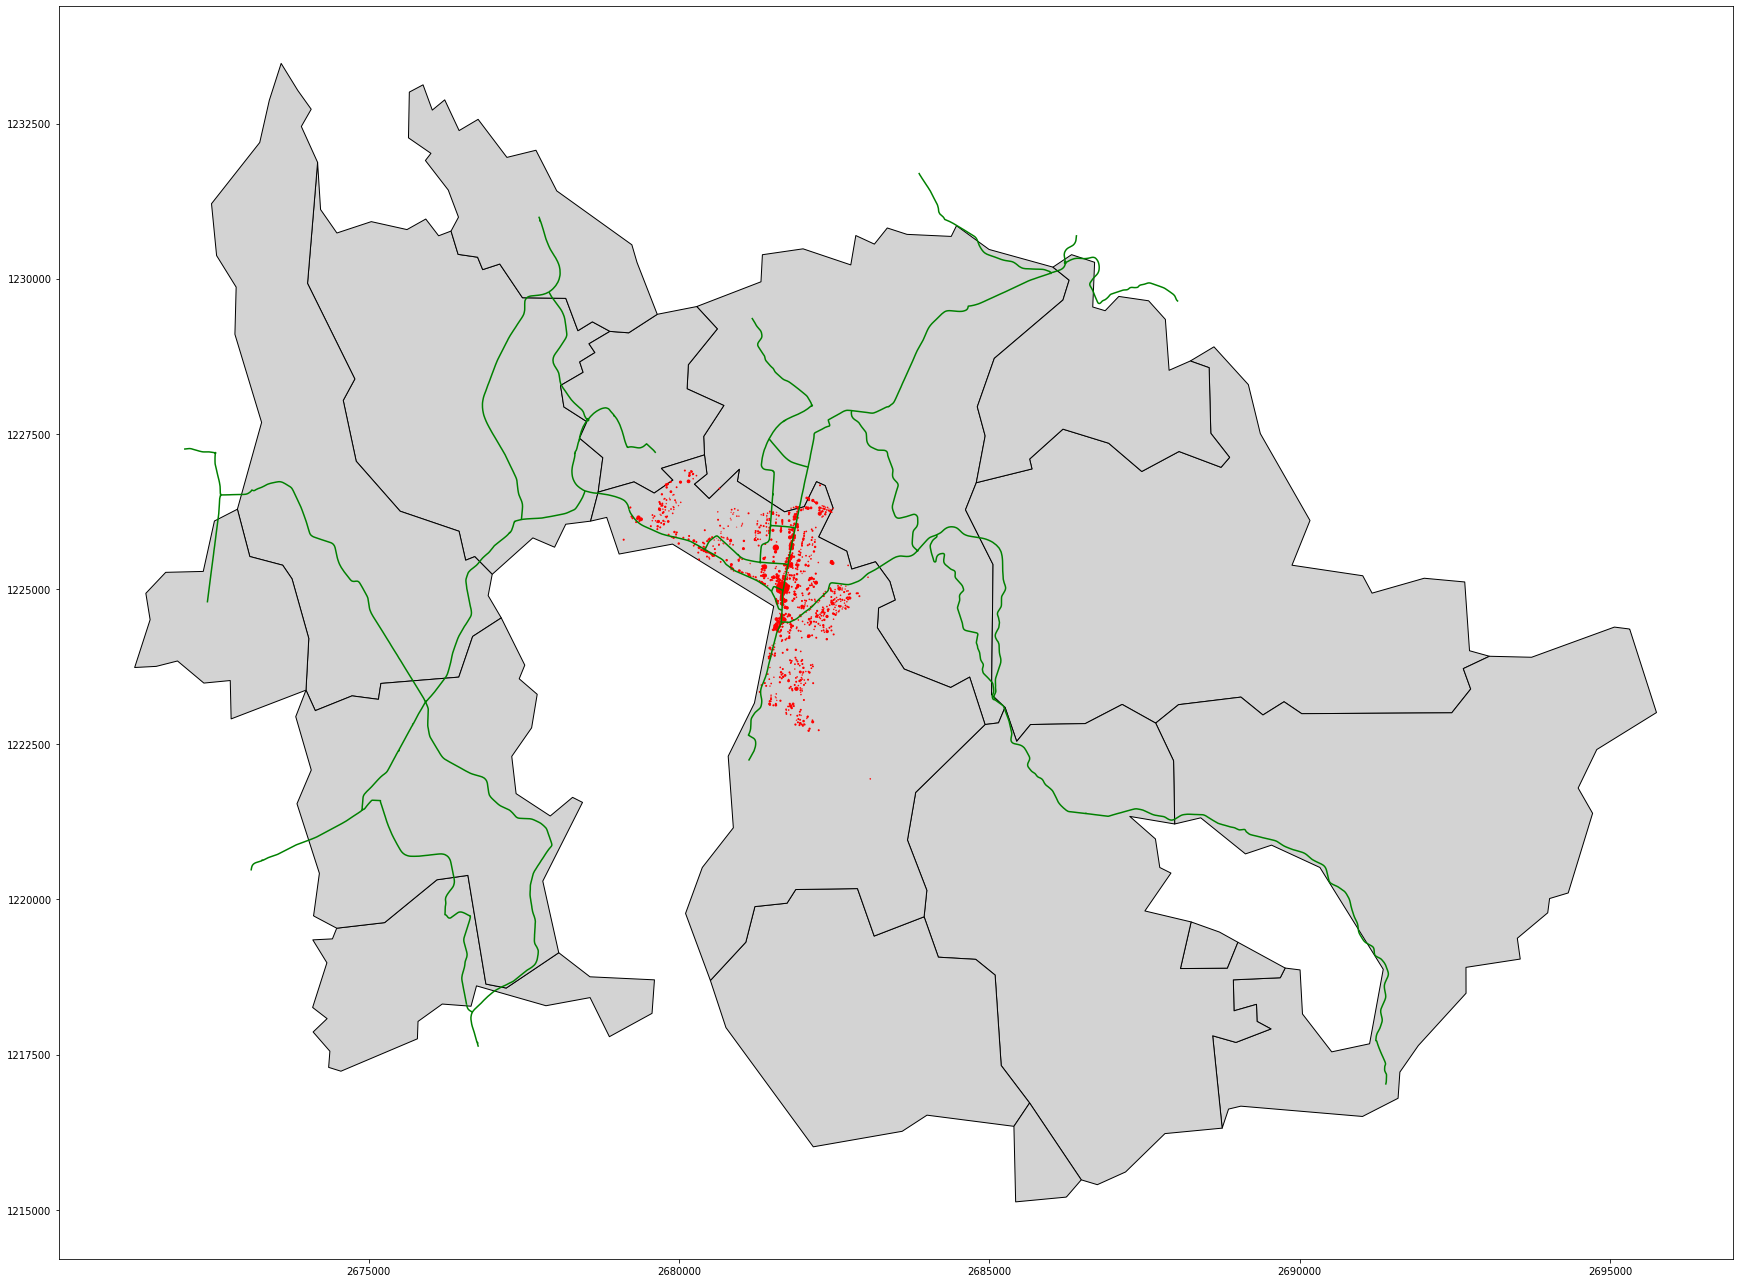

In [18]:
fig, ax = plt.subplots(figsize=(30,40))
gdf_strassen.plot(ax=ax, color='green', edgecolor='black', figsize=(20,30))

gdf_zg.plot(ax=ax, color='lightgrey', markersize=5,edgecolor='black', figsize=(20,30))

gdf_hr.plot(ax=ax, marker='o', color='red', markersize=gdf_hr['Vergleich'], figsize=(20,30))

plt.show()



### Nun noch mit Strasse für die Stadt Zug

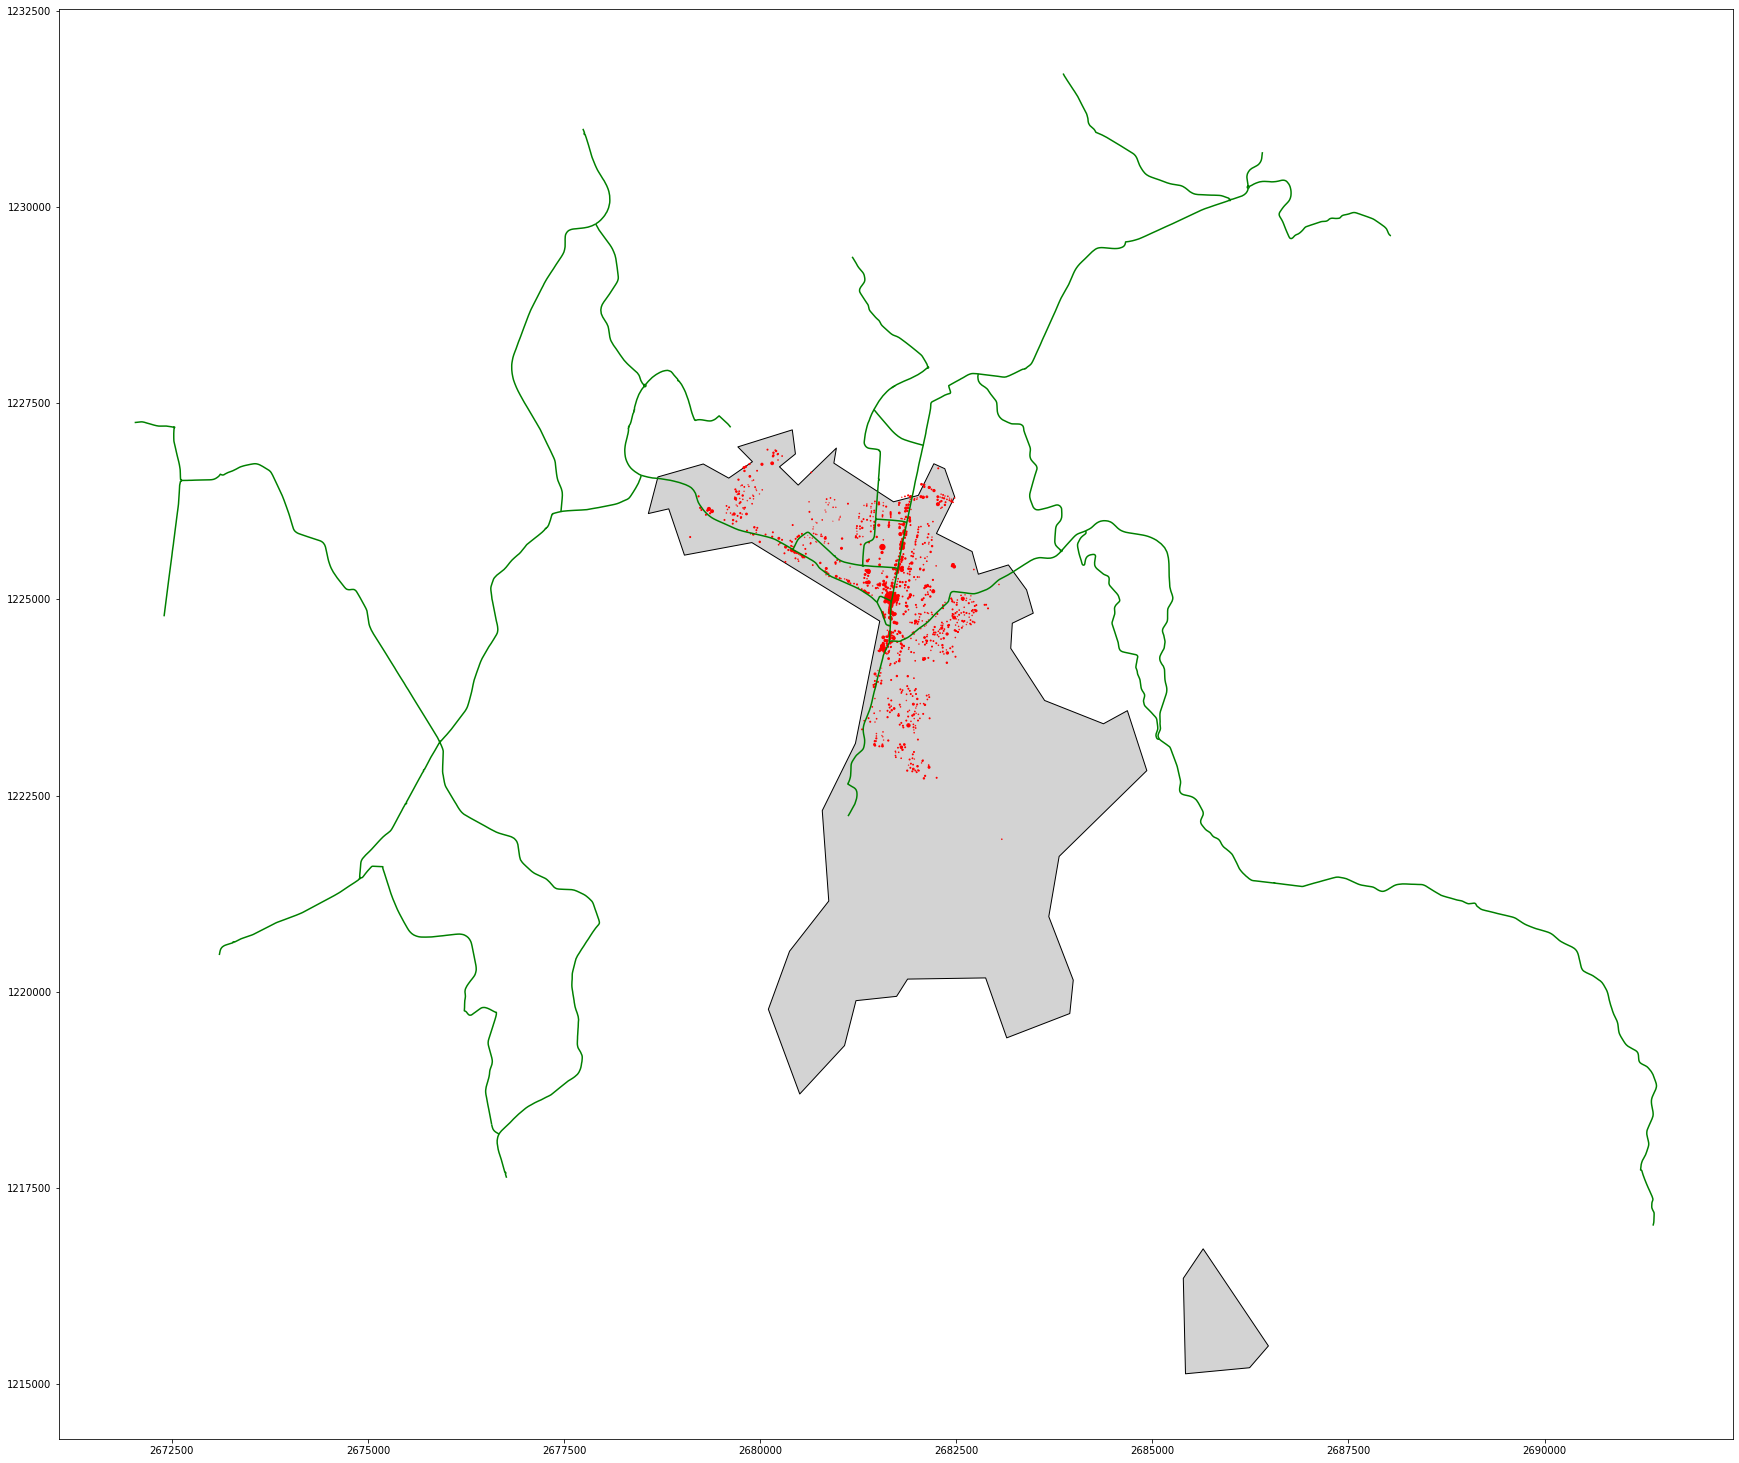

(2678000, 2684000)

In [19]:
fig, ax = plt.subplots(figsize=(30,40))
gdf_strassen.plot(ax=ax, color='green', edgecolor='black', figsize=(20,30))

gdf_stadtzug.plot(ax=ax, color='lightgrey', markersize=5,edgecolor='black', figsize=(20,30))

gdf_hr.plot(ax=ax, marker='o', color='red', markersize=gdf_hr['Vergleich'], figsize=(20,30))

plt.show()
ax.set_ylim([1222000,1227000])
ax.set_xlim([2678000, 2684000])

#### Nun auch für die Strassen nur Zug. Vielleicht mit Hilfe der overlay-Funktion?

In [51]:
#Intersection funktioniert nicht, da ich nur Linien habe
gdfkarte= gpd.overlay(gdf_strassen, gdf_stadtzug, how='intersection')

TypeError: overlay only takes GeoDataFrames with (multi)polygon  geometries.

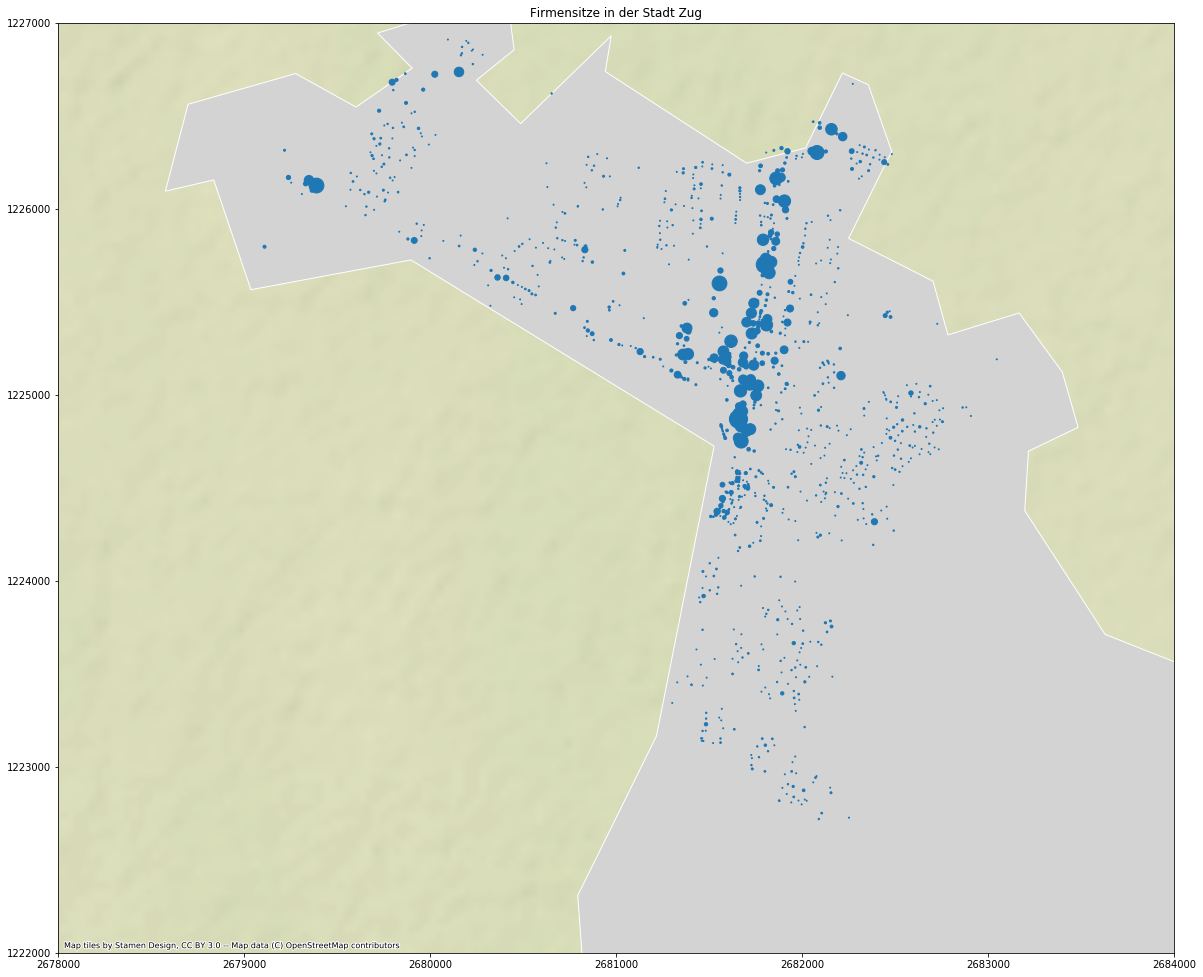

In [59]:
#vielleicht mit add_basemap. 
ax = gdf_stadtzug.plot(figsize=(20,25), color='lightgrey', edgecolor='white')
gdf_hr.plot(figsize=(20,25), markersize=gdf_hr['Firmen'], ax=ax)
ax.set_title("Firmensitze in der Stadt Zug")
ax.set_ylim([1222000,1227000])
ax.set_xlim([2678000, 2684000])
ctx.add_basemap(ax, zoom=12)
# Hmm noch nicht das was es sein sollte. Vielleicht noch Format anpassen

#### Wie bringe ich die Punkte zusammen mit der Karte hin
Ich muss zuerst dem gdf_hr ein crs-Format geben. Danach in das Merkator-Format umwandeln.

In [18]:
gdf_stadtzug_es = gdf_stadtzug.to_crs(epsg=3857) #umwalndeln in Merkator
gdf_hr.crs=({'init' :'epsg:21781'}) #Zuerst crs. geben
gdf_hr.to_crs(epsg=3857)# umwandeln in Merkator

,Adresse,Firmen,Telbuch,Vergleich,GDENAME,GKODE,GKODN,Wurzelwert,Punkt
0,"Chamerstrasse 56, Zug",27,13,2.076923,Zug,2680767.178,1225465.852,5.196152,POINT (4297454.369 6873337.537)
1,"Chamerstrasse 56a, Zug",4,1,4.000000,Zug,2680843.426,1225394.913,2.000000,POINT (4297524.220 6873184.183)
2,"Chamerstrasse 61, Zug",3,3,1.000000,Zug,2680565.382,1225536.612,1.732051,POINT (4297197.136 6873568.471)
3,"Chamerstrasse 63, Zug",4,1,4.000000,Zug,2680545.495,1225542.482,2.000000,POINT (4297171.102 6873589.580)
4,"Chamerstrasse 65, Zug",4,2,2.000000,Zug,2680530.197,1225560.294,2.000000,POINT (4297159.300 6873625.701)
...,...,...,...,...,...,...,...,...,...
1010,"Chamerstrasse 45, Zug",2,5,0.400000,Zug,2680878.372,1225294.140,1.414214,POINT (4297514.015 6873011.832)
1011,"Chamerstrasse 47, Zug",1,4,0.250000,Zug,2680840.404,1225315.633,1.000000,POINT (4297470.678 6873067.512)
1012,"Chamerstrasse 50, Zug",15,12,1.250000,Zug,2680869.425,1225328.661,3.872983,POINT (4297522.021 6873068.997)
1013,"Chamerstrasse 52, Zug",11,5,2.200000,Zug,2680846.193,1225345.734,3.316625,POINT (4297497.930 6873108.931)


Text(0.5, 1, 'Firmensitze in der Stadt Zug')

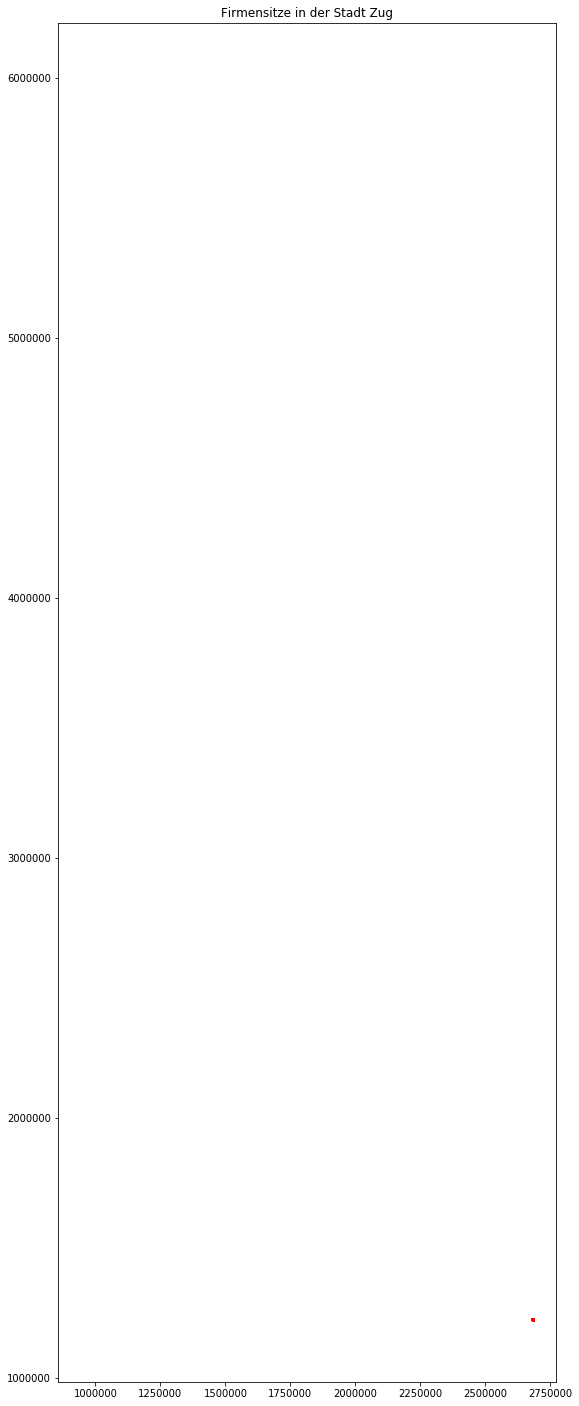

In [19]:
ax = gdf_stadtzug_es.plot(figsize=(20,25), alpha=0, edgecolor='white')
gdf_hr.plot(figsize=(20,25), markersize=3,color="red", ax=ax)
ax.set_title("Firmensitze in der Stadt Zug")
#ctx.add_basemap(ax)
#ax.set_ylim([5965000,5973000])
#ax.set_xlim([942000, 952000])
# Die PUnkte kommen einfach nicht mehr... 
#https://gis.stackexchange.com/questions/283677/geometry-data-in-geodataframe-will-not-plot (vielleicht da was)

In [ ]:
ax.set_ylim([1222000,1227000])
ax.set_xlim([2678000, 2684000])

In [ ]:
ax = gdf_stadtzug_es.plot(figsize=(20,25), alpha=0, edgecolor='white')
gdf_hr.plot(figsize=(20,25), markersize=3,color="red")

In [18]:
gdf_landeskarte = gpd.read_file(folderpath_geo+'\Landeskarte\geothermie.shp')

In [20]:
gdf_landeskarte

,ID,CONTOUR,NAME,geometry
0,1,100,100,"LINESTRING (680700.000 282152.964, 680731.250 ..."
1,2,100,100,"LINESTRING (697366.672 281190.000, 696829.028 ..."
2,3,110,110,"LINESTRING (710477.786 281190.000, 710464.709 ..."
3,4,100,100,"LINESTRING (640700.000 273140.001, 640716.258 ..."
4,5,80,80,"LINESTRING (632752.628 271190.000, 632720.615 ..."
...,...,...,...,...
92,93,20,20,"LINESTRING (692144.443 96190.000, 692179.996 9..."
93,94,30,30,"LINESTRING (695979.999 96190.000, 696025.577 9..."
94,95,40,40,"LINESTRING (655700.000 119017.591, 655981.693 ..."
95,96,50,50,"LINESTRING (700700.000 92502.500, 701054.843 9..."


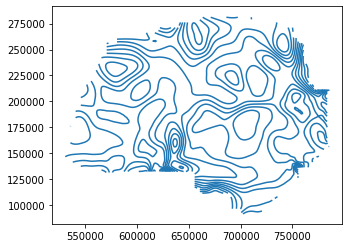

In [19]:
gdf_landeskarte.plot()

In [ ]:
ax = gdf_zg.plot(figsize=(14,10), color='lightgrey', edgecolor='white')
gdf_hr.plot(figsize=(14,10), markersize=3, ax=ax)

In [17]:
gdfstr=gpd.read_file(folderpath_geo+"\Strassendaten\Shapefiles\09_DKM1M_STRASSE_PKT.shp")

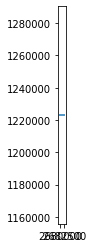